#### KIEM TRA ANH XA TUYEN TINH


In [6]:
import sympy as sp
from sympy import lambdify
x1, x2, x3 = sp.symbols('x1 x2 x3')
bieuthuc1 = x1 - x2 + x3
f1 = lambdify([x1, x2, x3], bieuthuc1, 'numpy')
a, b, c = sp.symbols('a b c') # khai báo thêm 3 biến a, b, c giả định X = (a, b, c)
d, e, f = sp.symbols('d e f') # khai báo thêm 3 biến d, e, f giả định Y = (e, d, f)
f1(a, b, c)

f1(d, e, f)

d - e + f

In [7]:
f1(a+d, b+e, c+f)

a - b + c + d - e + f

In [8]:
f1(a,b,c) + f1(d,e,f) == f1(a+d, b+e, c+f)

True

In [9]:
(f1(a,b,c) + f1(d,e,f)).equals( f1(a+d, b+e, c+f))


True

Lưu ý: Sympy hỗ trợ hàm expand() để khai triển các đa thức và sử dụng như sau:


In [10]:
# sinh viên ghi kết quả (đúng hoặc sai)
q = sp.symbols('q')
(q*f1(a,b,c) + f1(d,e,f)).equals(f1(q*a+d, q*b+e, q*c+f).expand())


True

Tương tự, sinh viên có thể kiểm tra với thành phần f2 còn lại 𝑓2 = 2𝑥1 + 3𝑥2


In [11]:
# sinh viên ghi kết quả (đúng hoặc sai)
bieuthuc2 = 2*x2 + 3* x3
f2 = lambdify([x1, x2, x3], bieuthuc2, 'numpy')
(q*f2(a,b,c) + f2(d,e,f)).equals(f2(q*a+d, q*b+e, q*c+f).expand())


True

### 1.2.Tìm tổ hợp tuyến tính cho một ánh xạ tuyến tính

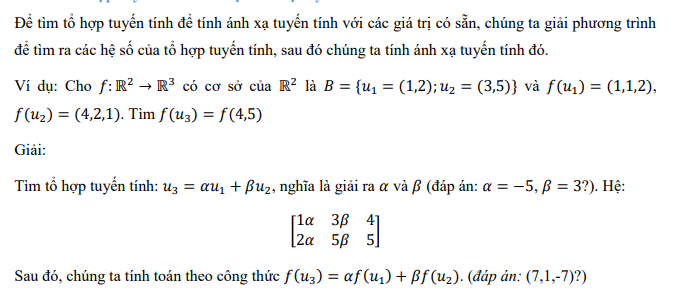

In [19]:
import numpy as np

# Các giá trị đã cho
B = np.array([[1, 2], [3, 5]])  # Ma trận cơ sở
f_u1 = np.array([1, 1, 2])  # f(u1)
f_u2 = np.array([4, 2, 1])  # f(u2)

# Tìm giá trị của u3
A = np.column_stack((B, np.array([4, 5])))  # Ma trận hệ số của u3
alpha, beta, _ = np.linalg.lstsq(A, np.array([4, 5]), rcond=None)[0]  # Giải phương trình tìm alpha và beta
u3 = alpha * B[:, 0] + beta * B[:, 1]  # Giá trị của u3

# Tính f(u3)
f_u3 = alpha * f_u1 + beta * f_u2

print("f(u3) =", f_u3)

f(u3) = [ 0.12        0.02666667 -0.08666667]


### 1.3.Tìm ánh xạ tuyến tính

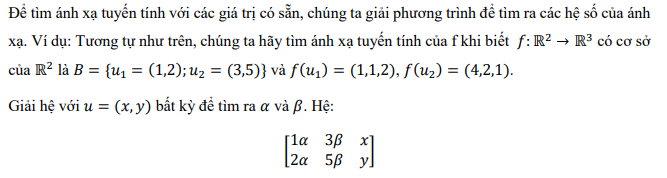

In [20]:
import sympy as sp

a, b = sp.symbols('a b')
x, y = sp.symbols('x y')


# sinh viên điền kết quả
sp.solve([a+3*b-x, 2*a+5*b-y],[a,b])

{a: -5*x + 3*y, b: 2*x - y}

In [22]:
#Sinh viên thực hiện code sau:
fu1 = np.array([1,1,2])
fu2 = np.array([4,2,1])
fu = a*fu1 + b*fu2
print (fu)

[a + 4*b a + 2*b 2*a + b]


In [23]:
# sinh viên điền kết quả
fu = a.subs(a, -5*x + 3*y)*fu1 + b.subs(b, 2*x - y)*fu2 # thay giá trị tìm được ở trên vào
print (fu)


[3*x - y -x + y -8*x + 5*y]


### 1.4.Tìm nhân của ánh xạ tuyến tính
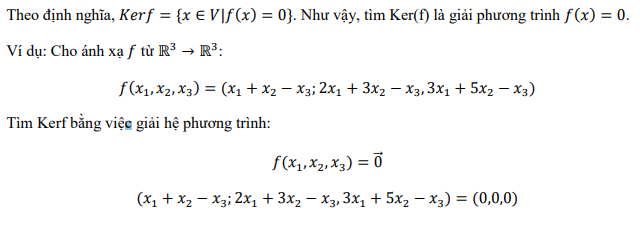

In [24]:
x1, x2, x3 = sp.symbols('x1 x2 x3')
sp.solve([x1+x2-x3, 2*x1+3*x2-x3, 3*x1+5*x2-x3],[x1, x2, x3])


{x2: -x3, x1: 2*x3}

Như vậy, chúng ta có thể chọn 1 tham số x3 = 1 và suy ra: x2 = -1, x1 = 2. Nghĩa là cơ sở không gian
nghiệm là 𝐾𝑒𝑟𝑓 = {(2𝑡, −𝑡,𝑡),𝑡 ∈ ℝ}

### 1.5. Ma trận của ánh xạ tuyến tính trong cặp cơ sở

In [26]:
import numpy as np


B = np.array([[1, 2], [1, 3]])  
f_u1 = np.array([-2, -1])  
f_u2 = np.array([1, 1])  


f_u1 = np.array([-2, -1])
f_u2 = np.array([1, 1])

A = np.linalg.solve(B.T, np.column_stack((f_u1, f_u2)))


A = A.T

print(A)

[[-5.  3.]
 [ 2. -1.]]


## 2.BAI TAP CHUONG 8

###### Câu 1: 
Sử dụng tính toán hình thức sympy, chứng minh ánh xạ sau là ánh xạ tuyến tính:  
𝑇(𝑣1, 𝑣2 ) = (𝑣1 − 𝑣2, 𝑣1 + 2𝑣2)

In [30]:
import sympy as sp

# Định nghĩa các biến và hàm
v1, v2 = sp.symbols('v1 v2')
T = sp.Matrix([v1 - v2, v1 + 2*v2])

# Áp dụng tính chất cộng cho ánh xạ T
u1, u2 = sp.symbols('u1 u2')
u = sp.Matrix([u1, u2])
T_sum = T.subs([(v1, v1 + u1), (v2, v2 + u2)])

# Áp dụng tính chất nhân với một số cho ánh xạ T
a = sp.Symbol('a')
T_scalar = T.subs([(v1, a * v1), (v2, a * v2)])

# Kiểm tra tính tuyến tính
linearity_check = T_sum.equals(T.subs([(v1, v1), (v2, v2)]) + T.subs([(v1, u1), (v2, u2)]))
scalar_check = T_scalar.equals(a * T.subs([(v1, v1), (v2, v2)]))

# In kết quả
print("Tính chất cộng: ", linearity_check)
print("Tính chất nhân với một số: ", scalar_check)

Tính chất cộng:  True
Tính chất nhân với một số:  True


nó thoả mãn hai tính chất của ánh xạ tuyến tính: tính chất cộng và tính chất nhân với một số.   
=> ánh xạ sau là ánh xạ tuyến tính

##### Cau 2

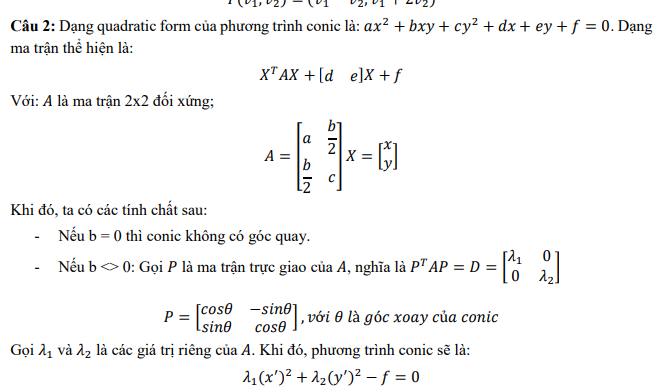

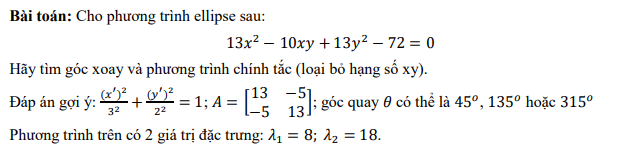

In [31]:
import numpy as np
from scipy.linalg import eigh
import math

# Ma trận A
A = np.array([[13, -5], [-5, 13]])

# Tính giá trị riêng và vector riêng
eigvals, eigvecs = eigh(A)

# Tính góc xoay
theta = math.atan2(2 * A[0][1], (A[0][0] - A[1][1])) / 2

# Chuyển đổi góc từ radian sang độ
theta = np.degrees(theta)

# In kết quả
print(f'Góc xoay: {theta} độ')
print(f'Phương trình chính tắc: (x\'^2)/{max(eigvals)} + (y\'^2)/{min(eigvals)} = 1')


Góc xoay: -45.0 độ
Phương trình chính tắc: (x'^2)/18.0 + (y'^2)/8.0 = 1
